In [ ]:
##work
import cv2
import numpy as np

img = cv2.imread(r'C:\Users\Rizwa\Downloads\archive (1)\s1.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow("imgi",img)

#otsu
ret2,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#threshold will convert it plain zero and white image
ret,thresh1 = cv2.threshold(img,200,255,cv2.THRESH_BINARY)#127 instead of 200

# Taking a matrix of size 5 as the kernel
kernel = np.ones((8,8), np.uint8)
 
img_dilation = cv2.dilate(thresh1, kernel, iterations=1)
 
cv2.imshow('Dilation', img_dilation)

n_white_pix = np.sum(img == 0)
print('Number of black pixels:', n_white_pix)

n_white_pix = np.sum(img_dilation == 0)
print('Number of black pixels:', n_white_pix)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img=img_dilation


In [ ]:
for i in range(len(img)):
    for j in range(len(img[i])):
        if img[i][j]==0:
            img[i][j]=255
        else:
            img[i][j]=0
s=img
print(s)

In [ ]:
##work
import numpy as np
import cv2

from matplotlib import pyplot as plt

# reading the image a s an eight bit grayscale image
# so the pixel values are in the range 0-255
img =img_dilation
#cv2.imwrite(r'C:\Users\Rizwa\Downloads\archive (1)\2original.png',img)

#--------------------binary segmentation------------------
# transform input image into pure black and white form
# pure white - rice grains
# pure black - background

# adaptive thresholding due to non uniform illumination in the image
#kernelSize, C = 25,-10
#img_adapt_thresh = th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,kernelSize, C)
#cv2.imwrite(r'C:\Users\Rizwa\Downloads\archive (1)\img_adapt_thresh.png',img_adapt_thresh)

# Morphological transformation:  Erosion
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
# to eliminate white noise and detach connected objects
#ksize = 3
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(ksize,ksize))
#eroded_img = cv2.erode(img_adapt_thresh, kernel)
#cv2.imwrite(r'C:\Users\Rizwa\Downloads\archive (1)\eroded_img.png',eroded_img)

#---------------------Connected components Analysis(CCA)----------------------
num_labels, labeledImg = cv2.connectedComponents(s)
cv2.imwrite(r'C:\Users\Rizwa\Downloads\archive (1)\labeledImg.png',labeledImg)

# Background is considered as another object in CCA.
# Therfore it needs to be subtracted to get the grain count
num_grains = num_labels -1
print(num_grains)


#-------------------Show components using a color Map.-------------------------

# find min and max pixel values and their locations the image.
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(labeledImg)

# Normalize the image so the min value is 0 and max value is 255.
labeledImg = (255/(maxVal-minVal)) * (labeledImg - minVal)

# Applying the color map for better visulization
imgColorMap = cv2.applyColorMap(labeledImg.astype('uint8'), cv2.COLORMAP_RAINBOW)

# Making the background black
imgColorMap[labeledImg==0] = 0
cv2.imwrite(r'C:\Users\Rizwa\Downloads\archive (1)\imgColorMap.png',imgColorMap)

# Display colormapped labels
plt.imshow(imgColorMap[:,:,::-1])

In [ ]:
#ridge count

In [7]:
import cv2
import numpy as np

img = cv2.imread(r'C:\Users\Rizwa\Downloads\archive (1)\s1.png', cv2.IMREAD_GRAYSCALE)
#cv2.imshow("imgi",img)

#otsu
ret2,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


#threshold will convert it plain zero and white image
ret,thresh1 = cv2.threshold(img,200,255,cv2.THRESH_BINARY)#127 instead of 200


# Taking a matrix of size 5 as the kernel
kernel = np.ones((8,8), np.uint8)
 
img_dilation = cv2.dilate(thresh1, kernel, iterations=1)
 
#cv2.imshow('Dilation', img_dilation)

n_white_pix = np.sum(img == 0)
print('Number of black pixels:', n_white_pix)

n_white_pix = np.sum(img_dilation == 0)
print('Number of black pixels:', n_white_pix)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

Number of black pixels: 22001
Number of black pixels: 13973


In [8]:
img=img_dilation

In [9]:
for i in range(len(img)):
    for j in range(len(img[i])):
        if img[i][j]==0:
            img[i][j]=255
        else:
            img[i][j]=0
s=img
print(s)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


5


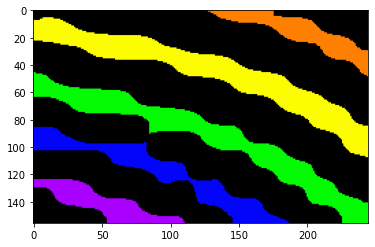

In [10]:
from matplotlib import pyplot as plt

num_labels, labeledImg = cv2.connectedComponents(s)

num_grains = num_labels -1
print(num_grains)

# find min and max pixel values and their locations the image.
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(labeledImg)

# Normalize the image so the min value is 0 and max value is 255.
labeledImg = (255/(maxVal-minVal)) * (labeledImg - minVal)

# Applying the color map for better visulization
imgColorMap = cv2.applyColorMap(labeledImg.astype('uint8'), cv2.COLORMAP_RAINBOW)

# Making the background black
imgColorMap[labeledImg==0] = 0

plt.imshow(imgColorMap[:,:,::-1])

47 55 102


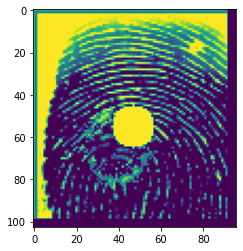

In [20]:
img = cv2.imread(r'C:\Users\Rizwa\OneDrive\Desktop\sam_db\3__M_Right_index_finger_CR.BMP', cv2.IMREAD_GRAYSCALE)
# Apply a Gaussian blur to the image to remove noise
img = cv2.GaussianBlur(img, (5,5), 0)

# Use the Sobel operator to detect the edges in the image
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel = sobel_x + sobel_y

_, thresholded = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY )


kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

moments = cv2.moments(closing)
core_x = int(moments["m10"] / moments["m00"])
core_y = int(moments["m01"] / moments["m00"])

img = cv2.imread(r'C:\Users\Rizwa\OneDrive\Desktop\sam_db\3__M_Right_index_finger_CR.BMP', cv2.IMREAD_GRAYSCALE)
cv2.circle(img, (core_x, core_y), 10, (255, 0, 255), -1)
plt.imshow(img)

print(core_x,core_y,core_x+core_y)

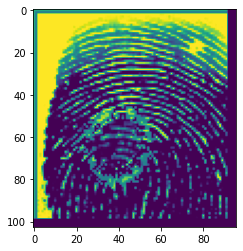

In [21]:
img = cv2.imread(r'C:\Users\Rizwa\OneDrive\Desktop\sam_db\3__M_Right_index_finger_CR.BMP', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [ ]:

# Load the fingerprint image
img = cv2.imread("fingerprint.jpg", 0)

# Apply a Gaussian blur to the image to remove noise
img = cv2.GaussianBlur(img, (5,5), 0)

# Use the Sobel operator to detect the edges in the image
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel = sobel_x + sobel_y

# Apply thresholding to the edge image to create a binary image
_, thresholded = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Use morphological operations to fill in any gaps in the ridges
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

# Find the center of the fingerprint (the "core")
moments = cv2.moments(closing)
core_x = int(moments["m10"] / moments["m00"])
core_y = int(moments["m01"] / moments["m00"])

# Draw a circle to indicate the core on the original image
img = cv2.imread("fingerprint.jpg")
cv2.circle(img, (core_x, core_y), 10, (0, 0, 255), -1)

# Display the original image with the core highlighted
cv2.imshow("Fingerprint", img)
cv2.waitKey(0)
cv2.destroyAllWindows()